## Import Library

In [11]:
import pandas as pd # untuk manipulasi data dan analisis data yang efisien dengan DataFrame.
import numpy as np # untuk operasi numerik dan array multidimensi.
import matplotlib.pyplot as plt # untuk membuat visualisasi statis dan interaktif dalam Python.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [12]:
import nltk # mengimpor pustaka NLTK (Natural Language Toolkit) ke dalam program Python Anda
nltk.download('stopwords') # mengunduh dataset yang berisi daftar kata-kata umum yang dikenal sebagai "stopwords"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 1) Load Data

In [13]:
data = pd.read_csv('Data/dataset_sms_spam_v1.csv')
data.tail()

,teks,label
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0
1140,Mba mau kirim 300 ya,0
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0
1142,No bri atas nama kamu mana,0


In [14]:
data['label'].unique()

array([2, 1, 0])

In [15]:
data['label'].value_counts()

label
0    569
1    335
2    239
Name: count, dtype: int64

In [16]:
data['label'] = data['label'].replace(2, 0)

In [17]:
data['label'].value_counts()

label
0    808
1    335
Name: count, dtype: int64

## 2) Preprocessing Data


### a.) Case Folding

In [18]:
import re

# membuat fungsi untuk case folding
def casefolding(text):
    text = text.lower() # merubah kalimat menjadi huruf kecil
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # menghapus url dari kalimat
    text = re.sub(r'[-+]?[0-9]+', '', text) # menghapus angka dari kalimat
    text = re.sub(r'[^\w\s]', '', text) # menghapus tanda baca
    text = text.strip()
    return text

In [19]:
# membandingkan before dan after case folding
raw_sample = data['teks'].iloc[16] # Use data instead of data
case_folding = casefolding(raw_sample)

print('Raw data\t :',raw_sample)
print('Case Folding\t :', case_folding)

Raw data	 : Anda sedang menikmati Paket Reguler dgn sisa kuota 209715 KB.Dapatkan beragam Paket INTERNET HEMAT Tri di *123*3#
Case Folding	 : anda sedang menikmati paket reguler dgn sisa kuota  kbdapatkan beragam paket internet hemat tri di


### b.) Normalisasi Kata

In [20]:
import pandas as pd

# Replace 'path/to/your/file/key_norm.csv' with the actual path to your file
key_norm = pd.read_csv('Data/key_norm.csv')

def text_normalize(text): # Fungsi ini didefinisikan untuk melakukan normalisasi teks
    text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0]
    if (key_norm['singkat'] == word).any()
    else word for word in text.split() # Memisahkan teks menjadi daftar kata-kata berdasarkan spasi
    ])

    text = str.lower(text) # mengubah teks menjadi huruf kecil
    return text

In [21]:
# membandingkan before dan after normalisasi kata

raw_data = data['teks'].iloc[317]
word_normal = text_normalize(case_folding)

print('Raw data\t :', raw_data)
print('Word Normalize\t :', word_normal)

Raw data	 : Ini bpk pnjam hp orng, tlng bliin bpk pls 50rb, krm ke nomr brunya bpk=081215008228, bpk lagi ada msalh di kantor polisi, jgn tlp/sms nnti bpk yg tlp, penting
Word Normalize	 : anda sedang menikmati paket reguler dgn sisa kuota kbdapatkan beragam paket internet hemat tri di


### c.) Stopword Removal (Filtering)

In [22]:
from nltk.tokenize import sent_tokenize, word_tokenize # untuk memecah teks menjadi kalimat, untuk memecah kalimat menjadi kata-kata
from nltk.corpus import stopwords # Baris ini mengimpor modul stopwords dari pustaka NLTK

stopwords_ind = stopwords.words('indonesian')

In [23]:
len(stopwords_ind) # variabel yang menyimpan daftar stopwords bahasa Indonesia yang diambil dari pustaka NLTK

758

In [24]:
# melihat daftar stopword dari nltk
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [25]:
# menambahkan kata dalam stopword
more_stopword = ['tsel', 'gb', 'rb', 'btw'] # mendefinisikan daftar tambahan kata-kata yang ingin ditambahkan ke dalam daftar stopwords
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_word(text):
    stopwords = set([
        'tsel', 'gb', 'rb', 'btw'
    ])
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)

In [26]:
raw_sample = data['teks'].iloc[981]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_word(case_folding)

print('Raw Data \t\t :', raw_data)
print('Case Folding \t\t :', case_folding)
print('Stopword Removal \t :', stopword_removal)

Raw Data 		 : Ini bpk pnjam hp orng, tlng bliin bpk pls 50rb, krm ke nomr brunya bpk=081215008228, bpk lagi ada msalh di kantor polisi, jgn tlp/sms nnti bpk yg tlp, penting
Case Folding 		 : pak mau tanya kalau nilai remed lebih kecil itu diambil nilai nya yang remed atau tetap yang sebelum nya pak
Stopword Removal 	 : pak mau tanya kalau nilai remed lebih kecil itu diambil nilai nya yang remed atau tetap yang sebelum nya pak


### d.) Stemming

In [27]:
# merubah kata menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# membuat fungsi untuk stemming bahasa indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text

In [28]:
raw_sample = data['teks'].iloc[981]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_word(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw Data \t\t :', raw_sample)
print('Case Folding \t\t :', case_folding)
print('Stopword Removal \t :', stopword_removal)
print('Stemming \t\t :', text_stemming)

Raw Data 		 : Pak mau tanya kalau nilai remed lebih kecil itu diambil nilai nya yang remed atau tetap yang sebelum nya pak ? 
Case Folding 		 : pak mau tanya kalau nilai remed lebih kecil itu diambil nilai nya yang remed atau tetap yang sebelum nya pak
Stopword Removal 	 : pak mau tanya kalau nilai remed lebih kecil itu diambil nilai nya yang remed atau tetap yang sebelum nya pak
Stemming 		 : pak mau tanya kalau nilai remed lebih kecil itu ambil nilai nya yang remed atau tetap yang belum nya pak


## 3) Text Preprocessing Pipeline

In [29]:
# membuat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = remove_stop_word(text)
    text = stemming(text)
    return text

In [30]:
%%time
# data['clean_teks'] = data['teks'].apply(text_preprocessing_process)

CPU times: total: 0 ns
Wall time: 0 ns


In [31]:
# data

In [32]:
# simpan data yang sudah dipreprocessing ke dalam file csv
# data.to_csv('Data/clean_data.csv', index=False)

In [33]:
data_clean = pd.read_csv('Data/clean_data.csv')
data_clean

,teks,label,clean_teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,0,promo beli paket flash mulai di my telkomsel a...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,0,hari hanya rupiah ribu spesial buat anda yang ...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",0,langgan yang hormat sisa kuota flash anda kb d...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",0,langgan yang hormat sisa kuota flash anda kb d...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,0,hari hanya rupiah ribu spesial buat anda yang ...
...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0,yooo sama oke nanti saya umumin di grup kelas
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0,belum ga ada nulis kerudung kirain warna jins
1140,Mba mau kirim 300 ya,0,mbak mau kirim ya
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0,nama beaok bwrangkat pagimau cas atay tranfer


## 4) Feature Engineering


In [34]:
# pisahkan kolom feature dan target
x = data_clean['clean_teks']
y = data_clean['label']

In [35]:
x

0       promo beli paket flash mulai di my telkomsel a...
1       hari hanya rupiah ribu spesial buat anda yang ...
2       langgan yang hormat sisa kuota flash anda kb d...
3       langgan yang hormat sisa kuota flash anda kb d...
4       hari hanya rupiah ribu spesial buat anda yang ...
                              ...                        
1138        yooo sama oke nanti saya umumin di grup kelas
1139        belum ga ada nulis kerudung kirain warna jins
1140                                    mbak mau kirim ya
1141        nama beaok bwrangkat pagimau cas atay tranfer
1142                        nomor bri atas nama kamu mana
Name: clean_teks, Length: 1143, dtype: object

In [36]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: label, Length: 1143, dtype: int64

## 5) Feature Extraction (TF-Idata)

In [37]:
# save model
import pickle

# RF-Idata
from sklearn.feature_extraction.text import TfidfVectorizer

# Unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1, 1))
vec_TF_IDF.fit(x)

x_tf_idata = vec_TF_IDF.transform(x)

# Save the entire model
with open("tfidf_vectorizer_model.sav", "wb") as file:
    pickle.dump(vec_TF_IDF, file)

In [38]:
# menampilkan vocabulary dari tf-idata
vec_TF_IDF.vocabulary_

{'promo': 2550,
 'beli': 345,
 'paket': 2337,
 'flash': 959,
 'mulai': 2108,
 'di': 728,
 'my': 2120,
 'telkomsel': 3169,
 'app': 171,
 'dpt': 830,
 'extra': 930,
 'kuota': 1749,
 'lte': 1872,
 'dan': 662,
 'telpon': 3172,
 'hingga': 1224,
 'mnthr': 2070,
 'buru': 512,
 'cek': 554,
 'tselmemytsel': 3317,
 'sk': 2975,
 'hari': 1176,
 'hanya': 1167,
 'rupiah': 2760,
 'ribu': 2709,
 'spesial': 3035,
 'buat': 485,
 'anda': 113,
 'yang': 3527,
 'pilih': 2430,
 'aktif': 71,
 'sekarang': 2850,
 'juga': 1493,
 'sd': 2821,
 'november': 2233,
 'langgan': 1785,
 'hormat': 1239,
 'sisa': 2968,
 'kb': 1574,
 'download': 826,
 'mytelkomsel': 2122,
 'apps': 176,
 'untuk': 3392,
 'kuotabeli': 1750,
 'atau': 217,
 'hub': 1258,
 'skb': 2976,
 'lagi': 1770,
 'ekstra': 889,
 'pulsa': 2588,
 'dg': 723,
 'internet': 1357,
 'bulan': 497,
 'pertama': 2418,
 'sjk': 2974,
 'augsept': 229,
 'detail': 718,
 'ada': 11,
 'iring': 1380,
 'dgn': 724,
 'tarif': 3135,
 'hr': 1248,
 'panjang': 2351,
 'dari': 669,
 'hits

In [39]:
# melihat jumlah feature
print(len(vec_TF_IDF.get_feature_names_out()))

3563


In [40]:
# melihat fitur apa saja yang ada didalam corpus
print(vec_TF_IDF.get_feature_names_out())

['aa' 'aamiiiin' 'aamiin' ... 'zjt' 'zona' 'ztkm']


In [41]:
x1 = vec_TF_IDF.transform(x).toarray()
data_tabular_tf_idata = pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names_out())
data_tabular_tf_idata

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acara,acaratks,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
data_tabular_tf_idata.iloc[10:20,60:70]

,ajar,ajeng,akademik,akan,akang,akangteteh,akbar,akhir,akreditasi,akses
10,0.0,0.0,0.0,0.231654,0.0,0.0,0.0,0.000000,0.0,0.000000
11,0.0,0.0,0.0,0.139011,0.0,0.0,0.0,0.154994,0.0,0.000000
12,0.0,0.0,0.0,0.160868,0.0,0.0,0.0,0.000000,0.0,0.000000
13,0.0,0.0,0.0,0.182731,0.0,0.0,0.0,0.000000,0.0,0.219226
14,0.0,0.0,0.0,0.235332,0.0,0.0,0.0,0.000000,0.0,0.000000
15,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
16,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
17,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
18,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
19,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


## 6) Feature Selection

In [43]:
x_train = np.array(data_tabular_tf_idata)
y_train = np.array(y)

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_features = SelectKBest(chi2, k=3000)
x_kbest_features = chi2_features.fit_transform(x_train, y_train)

# untuk reduce feature
print('Original Feature Number', x_train.shape[1])
print('Reduced Feature Number', x_kbest_features.shape[1])

Original Feature Number 3563
Reduced Feature Number 3000


In [45]:
Data = pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,0.163877
1,0.148267
2,0.549577
3,0.716455
4,0.783102
...,...
3558,0.120096
3559,0.494099
3560,0.716455
3561,0.294315


In [46]:
# menampilkan feature beserta nilainya
feature = vec_TF_IDF.get_feature_names_out()
feature

Data['Fitur'] = feature
Data

,Nilai,Fitur
0,0.163877,aa
1,0.148267,aamiiiin
2,0.549577,aamiin
3,0.716455,ab
4,0.783102,abadi
...,...,...
3558,0.120096,zalora
3559,0.494099,zarkasi
3560,0.716455,zjt
3561,0.294315,zona


In [47]:
# mengurutkan nilai feature terbaik
Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
1145,42.651211,hadiah
2433,37.687569,pin
2694,31.934183,resmi
1663,31.710244,klik
2000,30.815062,menang
...,...,...
1208,0.000095,henti
370,0.000093,beri
971,0.000055,format
1928,0.000047,malaysia


In [48]:
mask = chi2_features.get_support()
mask

array([ True,  True,  True, ...,  True,  True,  True], shape=(3563,))

In [49]:
# menampilkan fitur yang terpilih berdasarkan nilai mask atau nilai tertinggi yang sudah ditetapkan pada chi square
new_feature=[]
for bool, f in zip(mask,feature):
    if bool :
        new_feature.append(f)
    selected_feature = new_feature
selected_feature

['aa',
 'aamiiiin',
 'aamiin',
 'ab',
 'abadi',
 'abai',
 'abbee',
 'abdul',
 'acara',
 'acaratks',
 'account',
 'ada',
 'adalah',
 'adi',
 'adik',
 'adison',
 'admin',
 'administrasi',
 'adminlte',
 'adrian',
 'adu',
 'aduh',
 'advertising',
 'aea',
 'afbe',
 'affc',
 'afr',
 'afrika',
 'agak',
 'agam',
 'agar',
 'agen',
 'agendain',
 'agenpulsa',
 'ags',
 'agst',
 'agsts',
 'agt',
 'agtskinfodlj',
 'agua',
 'agun',
 'agustus',
 'agustuskunjungi',
 'ahaha',
 'ahub',
 'aidzin',
 'aigoo',
 'air',
 'aja',
 'ajaa',
 'ajaaa',
 'ajabri',
 'ajakin',
 'ajeng',
 'akan',
 'akang',
 'akbar',
 'akhir',
 'akreditasi',
 'akses',
 'aktif',
 'aktifasi',
 'aktivasi',
 'akucintaislam',
 'akun',
 'akurasi',
 'akurat',
 'alaikum',
 'alaikumsaya',
 'alaiqum',
 'alam',
 'alamsyah',
 'alat',
 'alesannya',
 'algoritma',
 'alhamdulillah',
 'alhuda',
 'ali',
 'aliando',
 'all',
 'allahaamiin',
 'alphard',
 'alquran',
 'alur',
 'aman',
 'amanda',
 'amat',
 'ambil',
 'amin',
 'ampuun',
 'an',
 'anabdullah',
 'an

In [50]:
# membuat vocabulary baru berdasarkan fitur yang terseleksi
new_selected_feature = {}

for(k,v) in vec_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_feature[k]=v

new_selected_feature

{'promo': 2550,
 'beli': 345,
 'paket': 2337,
 'flash': 959,
 'mulai': 2108,
 'my': 2120,
 'telkomsel': 3169,
 'app': 171,
 'extra': 930,
 'kuota': 1749,
 'lte': 1872,
 'dan': 662,
 'telpon': 3172,
 'hingga': 1224,
 'mnthr': 2070,
 'buru': 512,
 'cek': 554,
 'tselmemytsel': 3317,
 'sk': 2975,
 'hari': 1176,
 'hanya': 1167,
 'rupiah': 2760,
 'ribu': 2709,
 'spesial': 3035,
 'buat': 485,
 'anda': 113,
 'yang': 3527,
 'pilih': 2430,
 'aktif': 71,
 'sekarang': 2850,
 'juga': 1493,
 'sd': 2821,
 'langgan': 1785,
 'hormat': 1239,
 'sisa': 2968,
 'kb': 1574,
 'download': 826,
 'mytelkomsel': 2122,
 'apps': 176,
 'untuk': 3392,
 'kuotabeli': 1750,
 'atau': 217,
 'hub': 1258,
 'skb': 2976,
 'lagi': 1770,
 'ekstra': 889,
 'pulsa': 2588,
 'internet': 1357,
 'bulan': 497,
 'pertama': 2418,
 'sjk': 2974,
 'augsept': 229,
 'detail': 718,
 'ada': 11,
 'iring': 1380,
 'tarif': 3135,
 'hr': 1248,
 'panjang': 2351,
 'dari': 669,
 'hits': 1228,
 'armada': 189,
 'curi': 643,
 'hati': 1188,
 'tekan': 3162,

In [51]:
len(new_selected_feature)

3000

In [52]:
with open("new_selected_feature_tf-idf.sav", 'wb') as file:
    pickle.dump(new_selected_feature, file)

In [53]:
# menampilkan fitur yang sudah diseleksi
data_selected_feature = pd.DataFrame(x_kbest_features, columns=selected_feature)
data_selected_feature

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acara,acaratks,...,ythtri,yu,yudisium,yuk,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 7) Modelling

In [54]:
selected_x = x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1143, 3000))

In [55]:
# import library
import random
from sklearn.model_selection import train_test_split

# import algoritma naive bayes
from sklearn.naive_bayes import MultinomialNB

In [56]:
x = selected_x
y = data_clean.label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [57]:
# menampilkan jumlah data training dan data testing
print('Banyaknya X_train : ', len(x_train))
print('Banyaknya X_test : ', len(x_test))
print('Banyaknya Y_train : ', len(y_train))
print('Banyaknya Y_test : ', len(y_test))

Banyaknya X_train :  914
Banyaknya X_test :  229
Banyaknya Y_train :  914
Banyaknya Y_test :  229


## 8) Evaluasi Model

In [58]:
# masukkan library yang dibutuhkan
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [59]:
# proses training menggunakan naive bayes
NB = MultinomialNB()
model_nb = NB.fit(x_train, y_train)

predicted_nb = model_nb.predict(x_test)

CM_NB = confusion_matrix(y_test, predicted_nb)

print(classification_report(y_test, predicted_nb))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       163
           1       0.98      0.77      0.86        66

    accuracy                           0.93       229
   macro avg       0.95      0.88      0.91       229
weighted avg       0.93      0.93      0.93       229



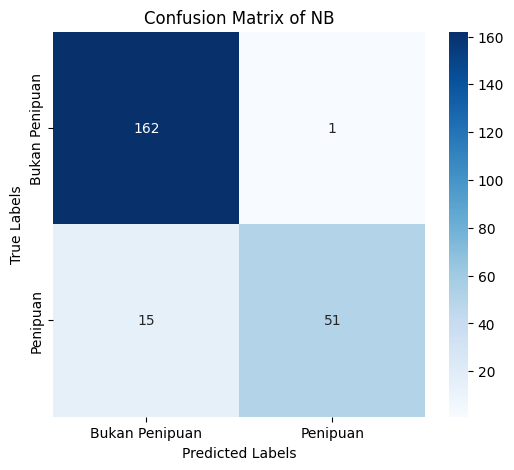

In [60]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(CM_NB, annot=True, fmt='d', cmap='Blues', xticklabels=['Bukan Penipuan', 'Penipuan'], yticklabels=['Bukan Penipuan', 'Penipuan'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of NB')
plt.show()

In [61]:
with open("model_fraud.sav", "wb") as file:
    pickle.dump(model_nb, file)

SVM

In [62]:
from sklearn.svm import SVC

# proses training menggunakan svm
SVM = SVC()

model_SVM = SVM.fit(x_train, y_train)

predicted_SVM = model_SVM.predict(x_test)

CM_SVM = confusion_matrix(y_test, predicted_SVM)

print(classification_report(y_test, predicted_SVM))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       163
           1       0.98      0.79      0.87        66

    accuracy                           0.93       229
   macro avg       0.95      0.89      0.91       229
weighted avg       0.94      0.93      0.93       229



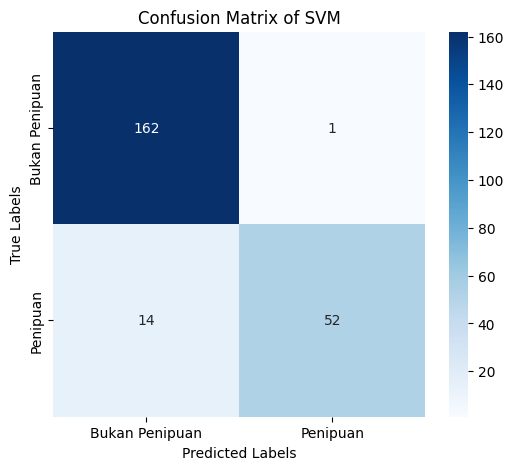

In [63]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(CM_SVM, annot=True, fmt='d', cmap='Blues', xticklabels=['Bukan Penipuan', 'Penipuan'], yticklabels=['Bukan Penipuan', 'Penipuan'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of SVM')
plt.show()

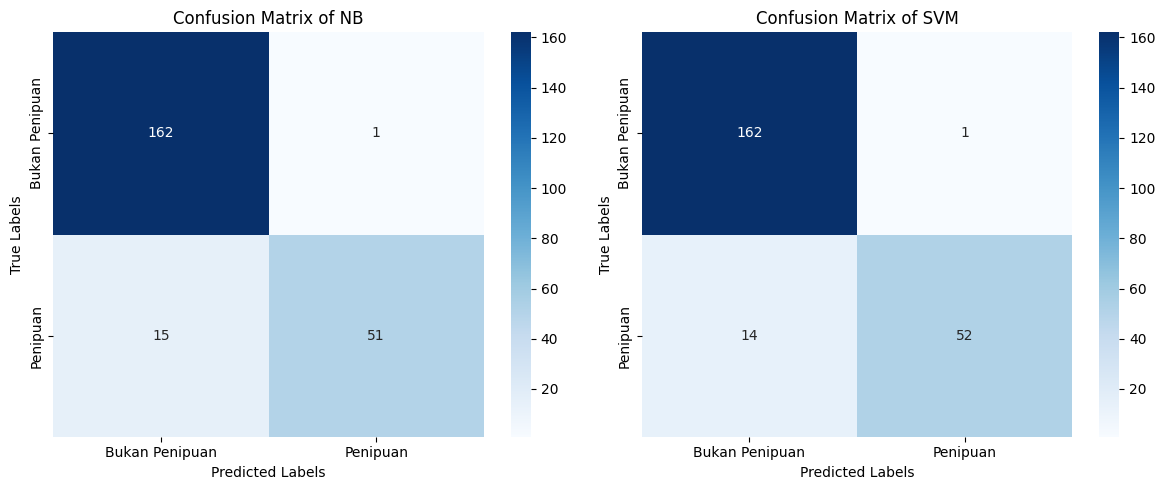

In [64]:
# Plot the confusion matrices side by side for NB and SVM
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# NB confusion matrix
sns.heatmap(CM_NB, annot=True, fmt='d', cmap='Blues', xticklabels=['Bukan Penipuan', 'Penipuan'], yticklabels=['Bukan Penipuan', 'Penipuan'], ax=ax[0])
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
ax[0].set_title('Confusion Matrix of NB')

# SVM confusion matrix
sns.heatmap(CM_SVM, annot=True, fmt='d', cmap='Blues', xticklabels=['Bukan Penipuan', 'Penipuan'], yticklabels=['Bukan Penipuan', 'Penipuan'], ax=ax[1])
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')
ax[1].set_title('Confusion Matrix of SVM')

plt.tight_layout()
plt.show()

## 9) Testing

NB

In [65]:
# membuat model prediksi
data_input = ("promo beli paket flash mulai di my telkomsel app dpt extra kuota g lte dan extra telpon hingga mnthr buru cek di tselmemytsel sk")
data_input = text_preprocessing_process(data_input)

# load
tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("new_selected_feature_tf-idf.sav", "rb"))))

hasil = model_nb.predict(loaded_vec.fit_transform([data_input]))

if(hasil==0):
    s = "SMS Bukan Penipuan"
elif(hasil==1):
    s = "SMS Penipuan"

print("Hasil Prediksi : \n", s)

Hasil Prediksi : 
 SMS Bukan Penipuan


ganti kalimat yang dimana bisa hasilnya penipuan

In [66]:
# membuat model prediksi

data_input = ("ganti kalimat yang dimana bisa hasilnya penipuan")
data_input = text_preprocessing_process(data_input)

# load
tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("new_selected_feature_tf-idf.sav", "rb"))))

hasil = model_nb.predict(loaded_vec.fit_transform([data_input]))

if(hasil==0):
    s = "SMS Bukan Penipuan"
elif(hasil==1):
    s = "SMS Penipuan"

print("Hasil Prediksi : \n", s)

Hasil Prediksi : 
 SMS Bukan Penipuan


SVM

In [67]:
# membuat model prediksi

data_input = ("promo beli paket flash mulai di my telkomsel app dpt extra kuota g lte dan extra telpon hingga mnthr buru cek di tselmemytsel sk")
data_input = text_preprocessing_process(data_input)

# load
tfidf = TfidfVectorizer

# Provide the full path to the saved file in your Google Drive
loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("new_selected_feature_tf-idf.sav", "rb"))))

hasil = model_SVM.predict(loaded_vec.fit_transform([data_input]).toarray())

if(hasil==0):
    s = "SMS Bukan Penipuan"
elif(hasil==1):
    s = "SMS Penipuan"

print("Hasil Prediksi : \n", s)

Hasil Prediksi : 
 SMS Bukan Penipuan


ganti kalimat yang dimana bisa hasilnya penipuan

In [68]:
# membuat model prediksi
data_input = ("ganti kalimat yang dimana bisa hasilnya penipuan")
data_input = text_preprocessing_process(data_input)

# load
tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("new_selected_feature_tf-idf.sav", "rb"))))

hasil = model_SVM.predict(loaded_vec.fit_transform([data_input]).toarray())

if(hasil==0):
    s = "SMS Bukan Penipuan"
elif(hasil==1):
    s = "SMS Penipuan"

print("Hasil Prediksi : \n", s)

Hasil Prediksi : 
 SMS Bukan Penipuan
